# Setup


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

!pip install opinionated
!pip install pyalex

import opinionated
import matplotlib.pyplot as plt
plt.style.use("opinionated_rc")
import colormaps as cmaps





# Setup Pyalex:
from pyalex import Works, Authors, Sources, Institutions, Concepts, Publishers, Funders
import pyalex
pyalex.config.email = "maximilian.noichl@uni-bamberg.de"

from itertools import chain

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 9.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 727.9/727.9 kB 17.5 MB/s eta 0:00:00
Now downloading: Roboto Condensed
Added new font as Roboto Condensed Light
Added new font as Roboto Condensed
Added new font as Roboto Condensed
Added new font as Roboto Condensed Black
Now downloading: Montserrat
Added new font as Montserrat Thin Light
Added new font as Montserrat Thin
Added new font as Montserrat Thin
Added new font as Montserrat Thin Black
Now downloading: Source Code Pro
Added new font as Source Code Pro ExtraLight Light
Added new font as Source Code Pro ExtraLight
Added new font as Source Code Pro ExtraLight
Added new font as Source Code Pro ExtraLight Black
Now downloading: Fira Sans
Added new font as Fira Sans Light
Added new font as Fira Sans
Added new font as Fira Sans
Added new font as Fira Sans Black
Now downloading: Fira Sans Condensed
Added new font as Fira Sans Condensed Light
Added new font as Fira

In [2]:
# prompt: set pandas to show all columns

import pandas as pd
pd.set_option('display.max_columns', None)


# Get Crossref data

In [3]:
!git clone https://gitlab.com/crossref/retraction-watch-data


Cloning into 'retraction-watch-data'...
remote: Enumerating objects: 253, done.
remote: Counting objects: 100% (236/236), done.
remote: Compressing objects: 100% (236/236), done.
remote: Total 253 (delta 102), reused 0 (delta 0), pack-reused 17 (from 1)
Receiving objects: 100% (253/253), 34.45 MiB | 2.46 MiB/s, done.
Resolving deltas: 100% (109/109), done.


In [4]:
df = pd.read_csv('retraction-watch-data/retraction_watch.csv')
df

,Record ID,Title,Subject,Institution,Journal,Publisher,Country,Author,URLS,ArticleType,RetractionDate,RetractionDOI,RetractionPubMedID,OriginalPaperDate,OriginalPaperDOI,OriginalPaperPubMedID,RetractionNature,Reason,Paywalled,Notes
0,58412,Toward a sustainable environment: nexus betwee...,(B/T) Business - Economics;(B/T) Technology;(E...,Faculty of Economics and Administrative Scienc...,Environmental Science and Pollution Research,Springer,Turkey;United Kingdom,Tomiwa Sunday Adebayo;Festus Fatai Adedoyin;De...,https://retractionwatch.com/2024/08/22/sleuths...,Research Article;,7/6/2024 0:00,10.1007/s11356-024-34259-w,38969899.0,5/18/2021 0:00,10.1007/s11356-021-14425-0,34003441.0,Retraction,+Author Unresponsive;+Concerns/Issues about Re...,No,NaN
1,58410,The step towards environmental mitigation in P...,(B/T) Business - Economics;(ENV) Environmental...,"Business Studies Department, Bahria Business S...",Environmental Science and Pollution Research,Springer,Iraq;Malaysia;Pakistan;Vietnam,Danish Iqbal Godil;Paiman Ahmad;Muhammad Sajja...,https://retractionwatch.com/2024/08/22/sleuths...,Research Article;,7/6/2024 0:00,10.1007/s11356-024-34261-2,38969887.0,1/7/2021 0:00,10.1007/s11356-020-11839-0,33415625.0,Retraction,+Author Unresponsive;+Concerns/Issues about Re...,No,NaN
2,58408,The impact of COVID-19 on small- and medium-si...,(B/T) Business - Economics;(ENV) Environmental...,"Sichuan Tourism University, Chengdu, China; Fa...",Environmental Science and Pollution Research,Springer,China;Pakistan,Lijie Du;Asif Razzaq;Muhammad Waqas,https://retractionwatch.com/2024/08/22/sleuths...,Research Article;,7/6/2024 0:00,10.1007/s11356-024-34262-1,38969888.0,8/2/2022 0:00,10.1007/s11356-022-22221-7,35917071.0,Retraction,+Author Unresponsive;+Concerns/Issues about Re...,No,NaN
3,58405,The detoxification of heavy metals from aqueou...,(ENV) Environmental Sciences;(ENV) Ground/Surf...,"Department of Physics, Faculty of Science, Uni...",Environmental Science and Pollution Research,Springer,Pakistan,Muhammad Bilal Tahir;Habiba Kiran;Tahir Iqbal,https://retractionwatch.com/2024/08/22/sleuths...,Review Article;,7/5/2024 0:00,10.1007/s11356-024-34257-y,38967852.0,3/5/2019 0:00,10.1007/s11356-019-04547-x,30835072.0,Retraction,+Concerns/Issues about Referencing/Attribution...,No,NaN
4,58404,The asymmetric effects of renewable energy con...,(B/T) Business - Economics;(ENV) Environmental...,"Department of Business Administration, Faculty...",Environmental Science and Pollution Research,Springer,Nigeria;Turkey,Sunday Adebayo;Husam Rjoub;Gbenga Daniel Akins...,https://retractionwatch.com/2024/08/22/sleuths...,Research Article;,7/6/2024 0:00,10.1007/s11356-024-34289-4,38969896.0,8/6/2021 0:00,10.1007/s11356-021-15706-4,34363156.0,Retraction,+Concerns/Issues about Referencing/Attribution...,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57800,5,Effect of Perindopril on Large Artery Stiffnes...,(BLS) Biochemistry;(HSC) Medicine - Cardiology...,"Alfred and Baker Medical Unit, Baker Heart Res...",JAMA: Journal of the American Medical Association,American Medical Association,Australia,Anna A Ahimastos;Anuradha Aggarwal;Kellie M D'...,http://retractionwatch.com/2015/11/23/jama-ret...,Clinical Study;Research Article;,12/22/2015 0:00,10.1001/jama.2015.16678,26594834.0,10/3/2007 0:00,10.1001/jama.298.13.1539,1791149.0,Retraction,+Falsification/Fabrication of Data;+Investigat...,No,NaN
57801,4,MtvR is a global small noncoding regulatory RN...,(BLS) Biology - Cellular;(BLS) Genetics;(BLS) ...,Institute for Biotechnology and Bioengineering...,Journal of Bacteriology,American Society for Microbiology,Portugal,Christian G Ramos;André M Grilo;Paulo J P da C...,http://retractionwatch.com/2014/11/03/post-doc...,Research Article;,11/1/2014 0:00,10.1128/JB.02299-14,25319527.0,5/31/2013 0:00,10.1128/JB.00242-13,2372964.0,Retraction,+Duplication of Image;+Manipulation of Images;,No,exact date of retraction unknown
57802,3,"The s

In [5]:
df=df.dropna(subset=['OriginalPaperDOI'])

In [6]:
set([type(x) for x in df['OriginalPaperDOI']])

{str}

In [7]:
df


,Record ID,Title,Subject,Institution,Journal,Publisher,Country,Author,URLS,ArticleType,RetractionDate,RetractionDOI,RetractionPubMedID,OriginalPaperDate,OriginalPaperDOI,OriginalPaperPubMedID,RetractionNature,Reason,Paywalled,Notes
0,58412,Toward a sustainable environment: nexus betwee...,(B/T) Business - Economics;(B/T) Technology;(E...,Faculty of Economics and Administrative Scienc...,Environmental Science and Pollution Research,Springer,Turkey;United Kingdom,Tomiwa Sunday Adebayo;Festus Fatai Adedoyin;De...,https://retractionwatch.com/2024/08/22/sleuths...,Research Article;,7/6/2024 0:00,10.1007/s11356-024-34259-w,38969899.0,5/18/2021 0:00,10.1007/s11356-021-14425-0,34003441.0,Retraction,+Author Unresponsive;+Concerns/Issues about Re...,No,NaN
1,58410,The step towards environmental mitigation in P...,(B/T) Business - Economics;(ENV) Environmental...,"Business Studies Department, Bahria Business S...",Environmental Science and Pollution Research,Springer,Iraq;Malaysia;Pakistan;Vietnam,Danish Iqbal Godil;Paiman Ahmad;Muhammad Sajja...,https://retractionwatch.com/2024/08/22/sleuths...,Research Article;,7/6/2024 0:00,10.1007/s11356-024-34261-2,38969887.0,1/7/2021 0:00,10.1007/s11356-020-11839-0,33415625.0,Retraction,+Author Unresponsive;+Concerns/Issues about Re...,No,NaN
2,58408,The impact of COVID-19 on small- and medium-si...,(B/T) Business - Economics;(ENV) Environmental...,"Sichuan Tourism University, Chengdu, China; Fa...",Environmental Science and Pollution Research,Springer,China;Pakistan,Lijie Du;Asif Razzaq;Muhammad Waqas,https://retractionwatch.com/2024/08/22/sleuths...,Research Article;,7/6/2024 0:00,10.1007/s11356-024-34262-1,38969888.0,8/2/2022 0:00,10.1007/s11356-022-22221-7,35917071.0,Retraction,+Author Unresponsive;+Concerns/Issues about Re...,No,NaN
3,58405,The detoxification of heavy metals from aqueou...,(ENV) Environmental Sciences;(ENV) Ground/Surf...,"Department of Physics, Faculty of Science, Uni...",Environmental Science and Pollution Research,Springer,Pakistan,Muhammad Bilal Tahir;Habiba Kiran;Tahir Iqbal,https://retractionwatch.com/2024/08/22/sleuths...,Review Article;,7/5/2024 0:00,10.1007/s11356-024-34257-y,38967852.0,3/5/2019 0:00,10.1007/s11356-019-04547-x,30835072.0,Retraction,+Concerns/Issues about Referencing/Attribution...,No,NaN
4,58404,The asymmetric effects of renewable energy con...,(B/T) Business - Economics;(ENV) Environmental...,"Department of Business Administration, Faculty...",Environmental Science and Pollution Research,Springer,Nigeria;Turkey,Sunday Adebayo;Husam Rjoub;Gbenga Daniel Akins...,https://retractionwatch.com/2024/08/22/sleuths...,Research Article;,7/6/2024 0:00,10.1007/s11356-024-34289-4,38969896.0,8/6/2021 0:00,10.1007/s11356-021-15706-4,34363156.0,Retraction,+Concerns/Issues about Referencing/Attribution...,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57800,5,Effect of Perindopril on Large Artery Stiffnes...,(BLS) Biochemistry;(HSC) Medicine - Cardiology...,"Alfred and Baker Medical Unit, Baker Heart Res...",JAMA: Journal of the American Medical Association,American Medical Association,Australia,Anna A Ahimastos;Anuradha Aggarwal;Kellie M D'...,http://retractionwatch.com/2015/11/23/jama-ret...,Clinical Study;Research Article;,12/22/2015 0:00,10.1001/jama.2015.16678,26594834.0,10/3/2007 0:00,10.1001/jama.298.13.1539,1791149.0,Retraction,+Falsification/Fabrication of Data;+Investigat...,No,NaN
57801,4,MtvR is a global small noncoding regulatory RN...,(BLS) Biology - Cellular;(BLS) Genetics;(BLS) ...,Institute for Biotechnology and Bioengineering...,Journal of Bacteriology,American Society for Microbiology,Portugal,Christian G Ramos;André M Grilo;Paulo J P da C...,http://retractionwatch.com/2014/11/03/post-doc...,Research Article;,11/1/2014 0:00,10.1128/JB.02299-14,25319527.0,5/31/2013 0:00,10.1128/JB.00242-13,2372964.0,Retraction,+Duplication of Image;+Manipulation of Images;,No,exact date of retraction unknown
57802,3,"The s

<ipython-input-8-9aec3f88a1f9>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['retraction_date_column'] = df['RetractionDate'].apply(parse_date)
<ipython-input-8-9aec3f88a1f9>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['retraction_date_column'] = pd.to_datetime(df['retraction_date_column'], format='%m/%d/%Y %H:%M')


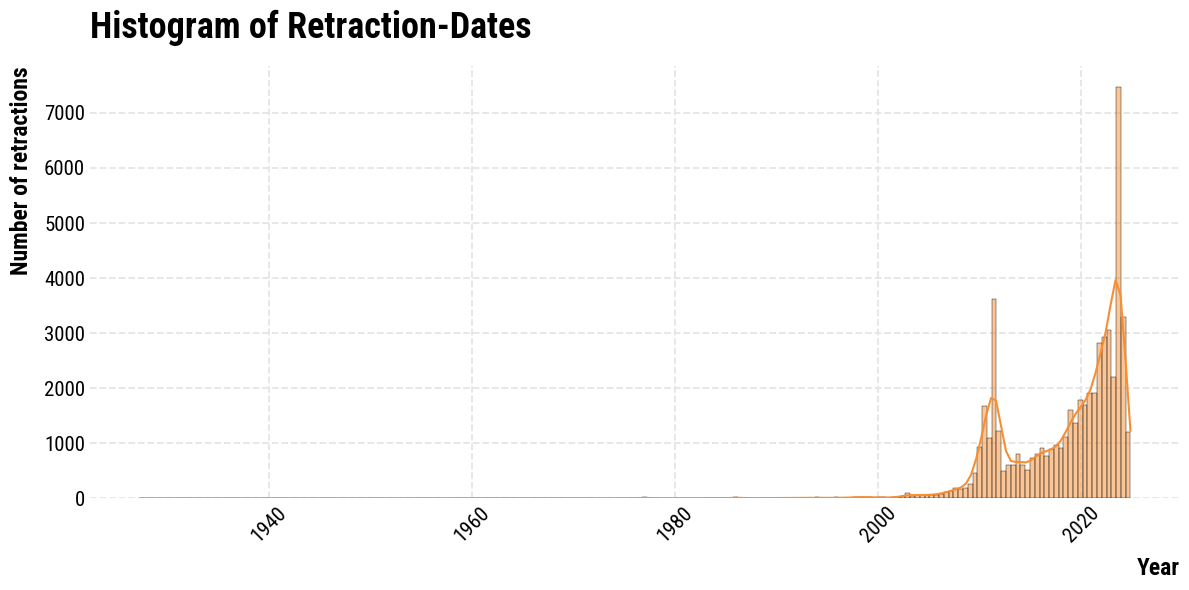

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def parse_date(date_string):
    try:
        return pd.to_datetime(date_string, format='%m/%d/%Y %H:%M')
    except ValueError:
        try:
            return pd.to_datetime(date_string, format='%m/%d/%Y %I:%M %p')
        except ValueError:
            # If both attempts fail, return NaT (Not a Time)
            return pd.NaT


# First, convert the date column to datetime type if it's not already
df['retraction_date_column'] = df['RetractionDate'].apply(parse_date)
df['retraction_date_column'] = pd.to_datetime(df['retraction_date_column'], format='%m/%d/%Y %H:%M')


# Create the plot
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='retraction_date_column', kde=True, color='#f98e31')

# Customize the plot
plt.title('Histogram of Retraction-Dates')
plt.xlabel('Year')
plt.ylabel('Number of retractions')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Adjust layout to prevent cutting off labels
plt.tight_layout()

# Display the plot
plt.show()


In [9]:
df['publication_date_column'] = df['OriginalPaperDate'].apply(parse_date)
df['publication_date_column'] = pd.to_datetime(df['publication_date_column'], format='%m/%d/%Y %H:%M')


<ipython-input-9-fe97d1f36912>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['publication_date_column'] = df['OriginalPaperDate'].apply(parse_date)
<ipython-input-9-fe97d1f36912>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['publication_date_column'] = pd.to_datetime(df['publication_date_column'], format='%m/%d/%Y %H:%M')


<ipython-input-10-4391461d4d94>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['time_to_retraction'] = (df['retraction_date_column'] - df['publication_date_column']).dt.days


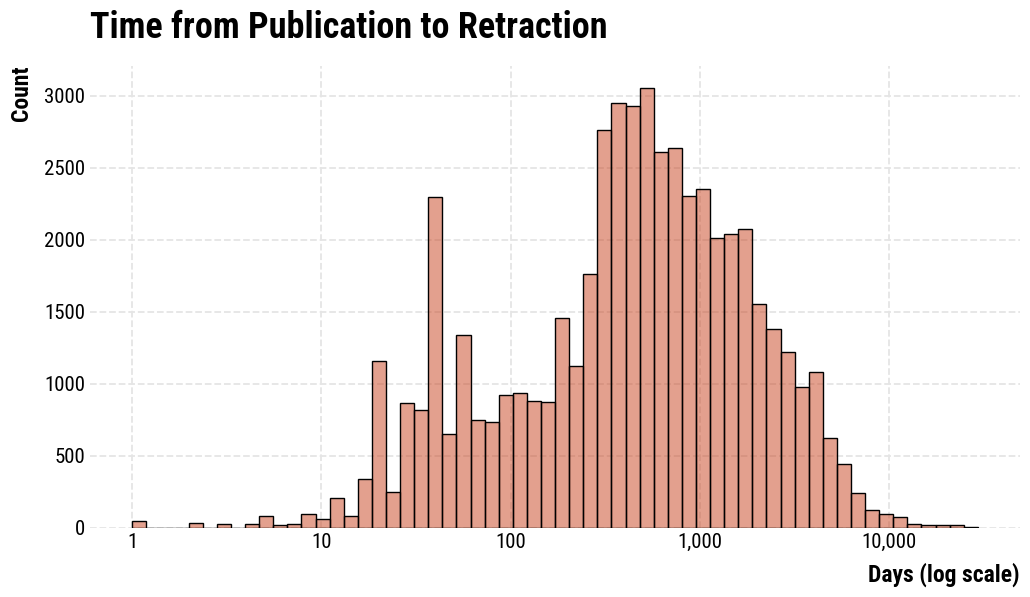

In [10]:
# Calculate the time difference in days
df['time_to_retraction'] = (df['retraction_date_column'] - df['publication_date_column']).dt.days

# Create the histogram using seaborn
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='time_to_retraction', kde=True, bins=60, log_scale=(True, False),color="#c9431e")

plt.title('Time from Publication to Retraction')
plt.xlabel('Days (log scale)')
plt.ylabel('Count')
plt.xscale('log')
plt.xticks([1, 10, 100, 1000, 10000], ['1', '10', '100', '1,000', '10,000'])


# Display the plot
plt.show()

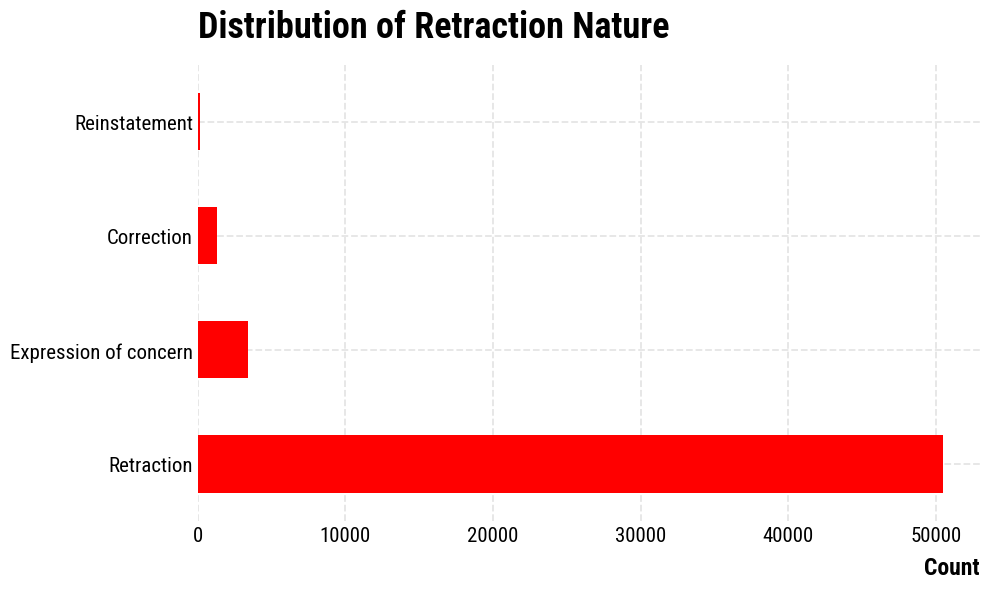

,count
RetractionNature,
Retraction,50464
Expression of concern,3373
Correction,1287
Reinstatement,143


In [17]:
# Create a horizontal bar plot of RetractionNature counts
plt.figure(figsize=(10, 6))
df['RetractionNature'].value_counts().plot(kind='barh', color='red')

# Customize the plot
plt.title('Distribution of Retraction Nature')
plt.xlabel('Count')
plt.ylabel('')
plt.tight_layout()  # Adjust layout to prevent label cutoff

# Display the plot
plt.show()

# Also display the actual counts
display(df['RetractionNature'].value_counts())

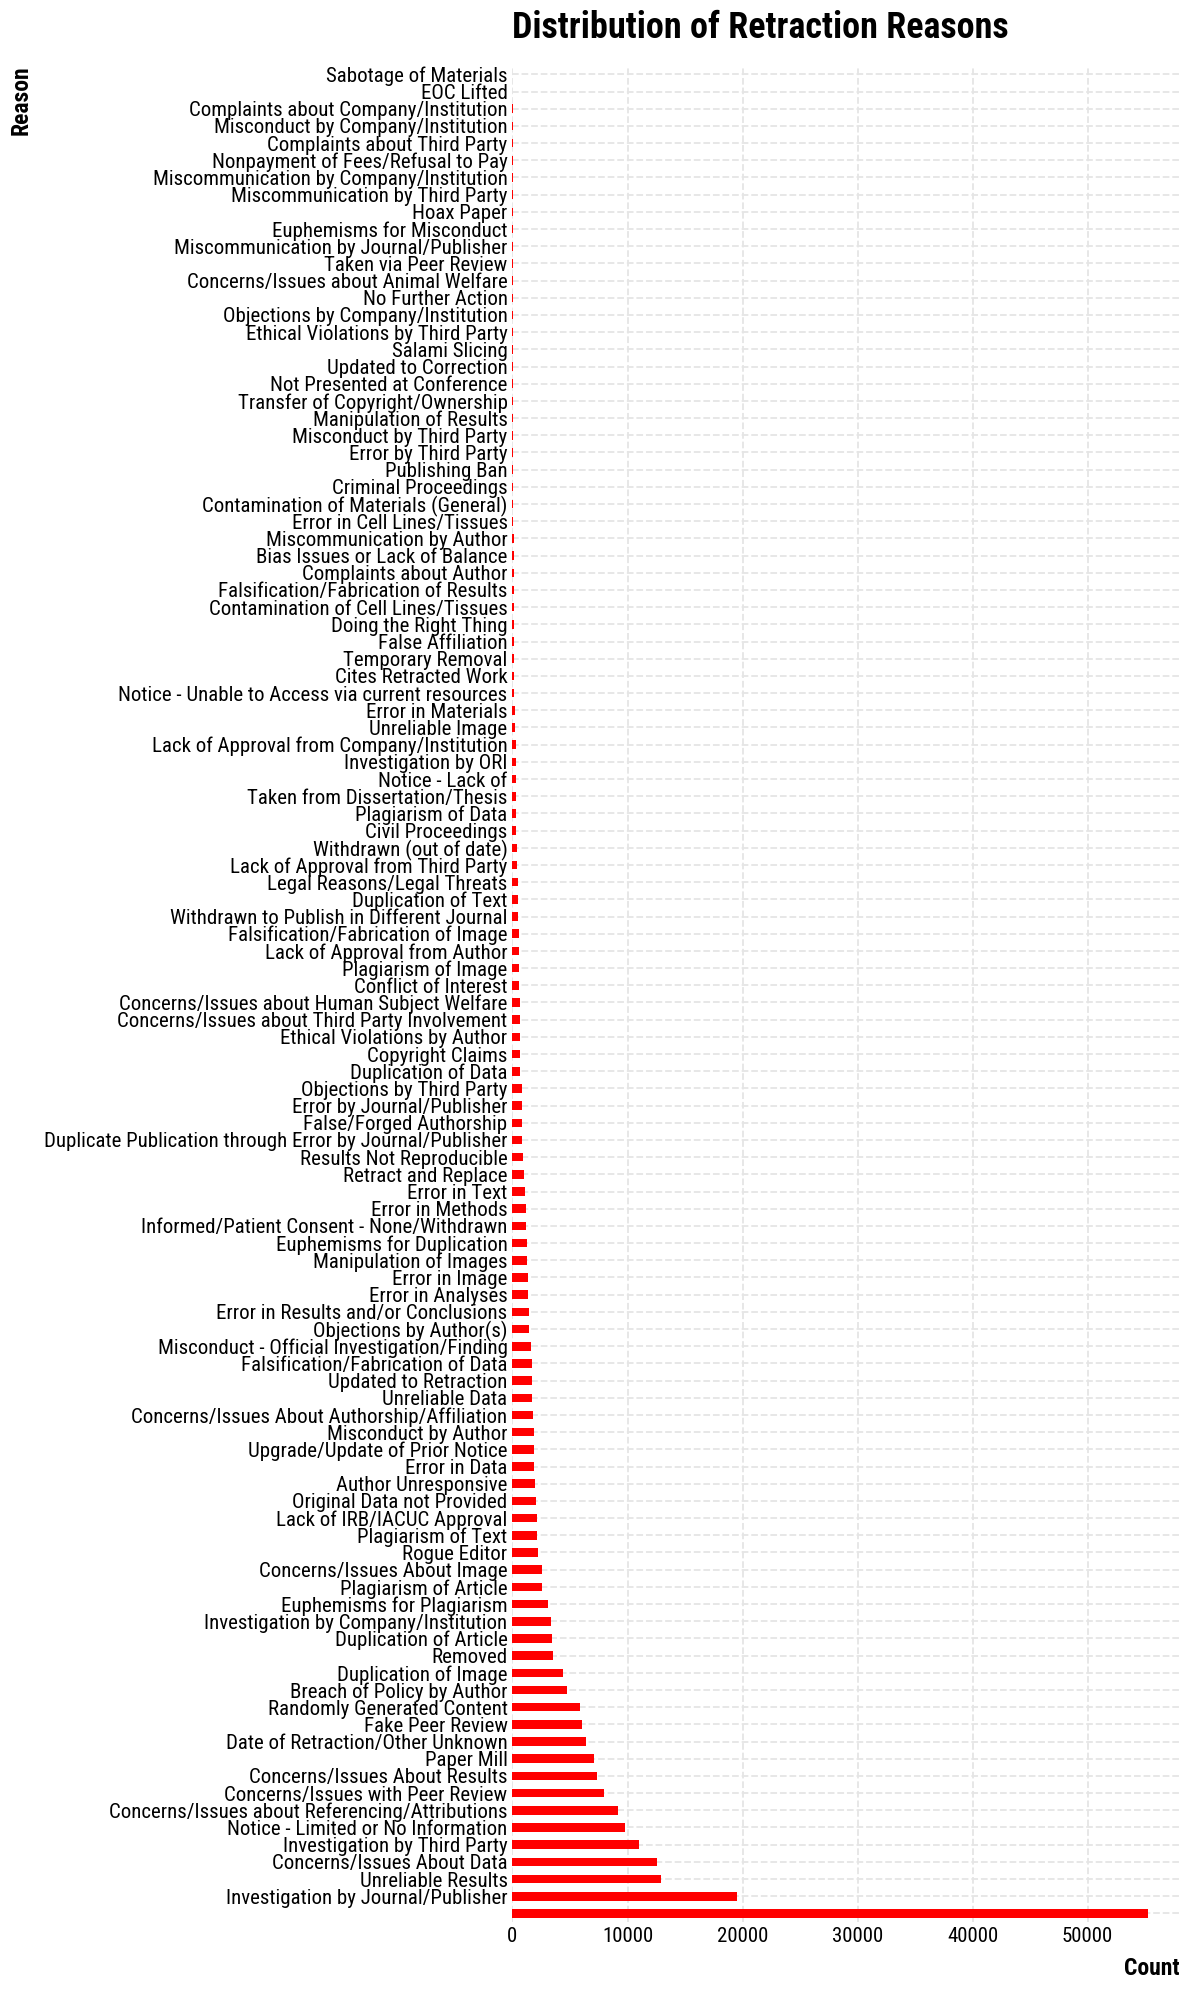

,count
Reason,
,55267
Investigation by Journal/Publisher,19479
Unreliable Results,12873
Concerns/Issues About Data,12525
Investigation by Third Party,11025
...,...
Complaints about Third Party,10
Misconduct by Company/Institution,8
Complaints about Company/Institution,4


In [20]:
# Split the strings and flatten the list
all_reasons = df['Reason'].str.split(';').explode()

# Clean up the reasons (remove '+' and strip whitespace)
all_reasons = all_reasons.str.replace('+', '').str.strip()

# Count frequencies and sort
reason_counts = all_reasons.value_counts()

# Create horizontal bar plot
plt.figure(figsize=(12, 20))
reason_counts.plot(kind='barh', color='red')

# Customize the plot
plt.title('Distribution of Retraction Reasons')
plt.xlabel('Count')
plt.ylabel('Reason')
plt.tight_layout()

# Display the plot
plt.show()

# Also display the actual counts
display(reason_counts)

In [22]:
!pip install squarify

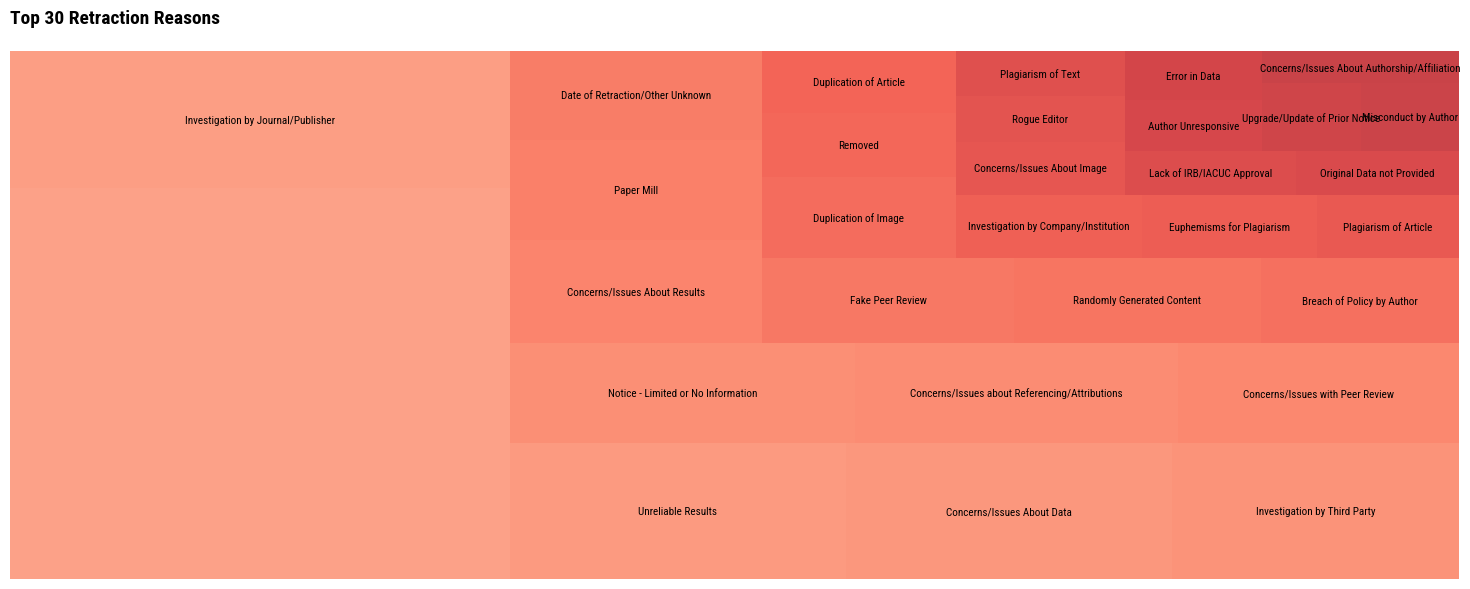

,count
Reason,
,55267
Investigation by Journal/Publisher,19479
Unreliable Results,12873
Concerns/Issues About Data,12525
Investigation by Third Party,11025
Notice - Limited or No Information,9783
Concerns/Issues about Referencing/Attributions,9165
Concerns/Issues with Peer Review,7980
Concerns/Issues About Results,7336


In [25]:
import squarify

# Split and clean the reasons as before
all_reasons = df['Reason'].str.split(';').explode()
all_reasons = all_reasons.str.replace('+', '').str.strip()
reason_counts = all_reasons.value_counts()

# Get top 30 reasons
top_30 = reason_counts.head(30)

# Create figure
plt.figure(figsize=(15, 6))

# Create treemap
squarify.plot(sizes=top_30.values,
              label=top_30.index,
              alpha=0.8,
              color=plt.cm.Reds(np.linspace(0.4, 0.8, len(top_30))),
              text_kwargs={'fontsize':8})

# Customize plot
plt.axis('off')
plt.title('Top 30 Retraction Reasons', fontsize=14, pad=20)

# Display the plot
plt.tight_layout()
plt.show()

# Also display the counts
display(top_30)

In [12]:
df#.sort_values(by=['time_to_retraction']).tail(30)

,Record ID,Title,Subject,Institution,Journal,Publisher,Country,Author,URLS,ArticleType,RetractionDate,RetractionDOI,RetractionPubMedID,OriginalPaperDate,OriginalPaperDOI,OriginalPaperPubMedID,RetractionNature,Reason,Paywalled,Notes,retraction_date_column,publication_date_column,time_to_retraction
0,58412,Toward a sustainable environment: nexus betwee...,(B/T) Business - Economics;(B/T) Technology;(E...,Faculty of Economics and Administrative Scienc...,Environmental Science and Pollution Research,Springer,Turkey;United Kingdom,Tomiwa Sunday Adebayo;Festus Fatai Adedoyin;De...,https://retractionwatch.com/2024/08/22/sleuths...,Research Article;,7/6/2024 0:00,10.1007/s11356-024-34259-w,38969899.0,5/18/2021 0:00,10.1007/s11356-021-14425-0,34003441.0,Retraction,+Author Unresponsive;+Concerns/Issues about Re...,No,NaN,2024-07-06,2021-05-18,1145.0
1,58410,The step towards environmental mitigation in P...,(B/T) Business - Economics;(ENV) Environmental...,"Business Studies Department, Bahria Business S...",Environmental Science and Pollution Research,Springer,Iraq;Malaysia;Pakistan;Vietnam,Danish Iqbal Godil;Paiman Ahmad;Muhammad Sajja...,https://retractionwatch.com/2024/08/22/sleuths...,Research Article;,7/6/2024 0:00,10.1007/s11356-024-34261-2,38969887.0,1/7/2021 0:00,10.1007/s11356-020-11839-0,33415625.0,Retraction,+Author Unresponsive;+Concerns/Issues about Re...,No,NaN,2024-07-06,2021-01-07,1276.0
2,58408,The impact of COVID-19 on small- and medium-si...,(B/T) Business - Economics;(ENV) Environmental...,"Sichuan Tourism University, Chengdu, China; Fa...",Environmental Science and Pollution Research,Springer,China;Pakistan,Lijie Du;Asif Razzaq;Muhammad Waqas,https://retractionwatch.com/2024/08/22/sleuths...,Research Article;,7/6/2024 0:00,10.1007/s11356-024-34262-1,38969888.0,8/2/2022 0:00,10.1007/s11356-022-22221-7,35917071.0,Retraction,+Author Unresponsive;+Concerns/Issues about Re...,No,NaN,2024-07-06,2022-08-02,704.0
3,58405,The detoxification of heavy metals from aqueou...,(ENV) Environmental Sciences;(ENV) Ground/Surf...,"Department of Physics, Faculty of Science, Uni...",Environmental Science and Pollution Research,Springer,Pakistan,Muhammad Bilal Tahir;Habiba Kiran;Tahir Iqbal,https://retractionwatch.com/2024/08/22/sleuths...,Review Article;,7/5/2024 0:00,10.1007/s11356-024-34257-y,38967852.0,3/5/2019 0:00,10.1007/s11356-019-04547-x,30835072.0,Retraction,+Concerns/Issues about Referencing/Attribution...,No,NaN,2024-07-05,2019-03-05,1949.0
4,58404,The asymmetric effects of renewable energy con...,(B/T) Business - Economics;(ENV) Environmental...,"Department of Business Administration, Faculty...",Environmental Science and Pollution Research,Springer,Nigeria;Turkey,Sunday Adebayo;Husam Rjoub;Gbenga Daniel Akins...,https://retractionwatch.com/2024/08/22/sleuths...,Research Article;,7/6/2024 0:00,10.1007/s11356-024-34289-4,38969896.0,8/6/2021 0:00,10.1007/s11356-021-15706-4,34363156.0,Retraction,+Concerns/Issues about Referencing/Attribution...,No,NaN,2024-07-06,2021-08-06,1065.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57800,5,Effect of Perindopril on Large Artery Stiffnes...,(BLS) Biochemistry;(HSC) Medicine - Cardiology...,"Alfred and Baker Medical Unit, Baker Heart Res...",JAMA: Journal of the American Medical Association,American Medical Association,Australia,Anna A Ahimastos;Anuradha Aggarwal;Kellie M D'...,http://retractionwatch.com/2015/11/23/jama-ret...,Clinical Study;Research Article;,12/22/2015 0:00,10.1001/jama.2015.16678,26594834.0,10/3/2007 0:00,10.1001/jama.298.13.1539,1791149.0,Retraction,+Falsification/Fabrication of Data;+Investigat...,No,NaN,2015-12-22,2007-10-03,3002.0
57801,4,MtvR is a global small noncoding regulatory RN...,(BLS) Biology - Cellular;(BLS) Genetics;(BLS) ...,Institute for Biotechnology and Bioengineering...,Journal of Bacteriology,American Society for Microbiology,Portugal,Christian G Ramos;André M Grilo;Paulo J P da C...,http://retractio

In [ ]:
df[df['Reason'].str.contains('Hoax')]

,Record ID,Title,Subject,Institution,Journal,Publisher,Country,Author,URLS,ArticleType,RetractionDate,RetractionDOI,RetractionPubMedID,OriginalPaperDate,OriginalPaperDOI,OriginalPaperPubMedID,RetractionNature,Reason,Paywalled,Notes,retraction_date_column,publication_date_column,time_to_retraction
6938,50885,Left-Handed Mothers and LGBTQ+ Child Acceptanc...,(SOC) Psychology;(SOC) Sexual And Marital Stud...,"Centre for Human Discovery, University of Simi...","Journal of Education, Society and Behavioural ...",ScienceDomain International,Singapore,Jin Rabak;Hen Guai Lan,NaN,Research Article;,1/10/2024 0:00,10.9734/jesbs/2023/v36i41216,0.0,3/14/2023 0:00,10.9734/jesbs/2023/v36i41216,0.0,Retraction,+Date of Retraction/Other Unknown;+Hoax Paper;...,No,"date of retraction unknown, html page overwrit...",2024-01-10,2023-03-14,302.0
17652,40126,"Mitochondria: Structure, Function and Clinical...",(BLS) Biology - Cellular;,"Department of Medical Cell Biology, University...",International Journal of Molecular Biology: Op...,MedCrave,Canada,Lucas McGeorge;Annette Kin,NaN,Review Article;,7/14/2017 0:00,unavailable,0.0,7/14/2017 0:00,10.15406/ijmboa.2017.02.00029,0.0,Retraction,+False Affiliation;+False/Forged Authorship;+H...,No,see: https://www.discovermagazine.com/mind/pre...,2017-07-14,2017-07-14,0.0
23273,34471,Donor money and the academy: Perceptions of un...,(B/T) Business - Economics;(SOC) Education;,"Department of Economics, University of Califor...",Higher Education Quarterly,Wiley,United States,Sage Owens;Kal Avers-Lynde III,NaN,Research Article;,12/2/2021 0:00,10.1111/hequ.12360,0.0,10/25/2021 0:00,10.1111/hequ.12360,0.0,Retraction,+Date of Retraction/Other Unknown;+Falsificati...,No,"date of retracted unknown, html page overwrite...",2021-12-02,2021-10-25,38.0
33693,24022,SARS-CoV-2 was Unexpectedly Deadlier than Push...,(HSC) Biostatistics/Epidemiology;(HSC) Medicin...,Belgian Institute of Technology and Education ...,Asian Journal of Medicine and Health,Asian Journal of Medicine and Health,Belgium;East Timor;France;Switzerland,Willard Oodendijk;Michaël Rochoy;Valentin Rugg...,http://retractionwatch.com/2020/08/16/hydroxyc...,Research Article;,8/16/2020 0:00,unavailable,0.0,8/15/2020 0:00,10.9734/AJMAH/2020/v18i930232,0.0,Retraction,+Hoax Paper;,No,NaN,2020-08-16,2020-08-15,1.0
37415,20282,Going in Through the Back Door: Challenging St...,(SOC) Sexual And Marital Studies;(SOC) Sociology;,Portland Ungendering Research Initiative (PURI...,Sexuality & Culture,Springer,United States,M Smith;Peter Boghossian;Helen Pluckrose;James...,http://retractionwatch.com/?s=Boghossian,Research Article;,12/1/2018 0:00,10.1007/s12119-018-9536-0,0.0,6/16/2018 0:00,10.1007/s12119-018-9536-0,0.0,Retraction,+Concerns/Issues About Authorship/Affiliation;...,No,M Smith and PURI are false names used by the o...,2018-12-01,2018-06-16,168.0
38082,19613,An Ethnography of Breastaurant Masculinity: Th...,(SOC) Sociology;,"Department of History, Gulf Coast State Colleg...",Sex Roles,Springer,United States,Richard Baldwin;Peter Boghossian;Helen Pluckro...,http://retractionwatch.com/?s=Peter+Boghossian,Research Article;,12/1/2018 0:00,10.1007/s11199-018-0962-0,0.0,9/19/2018 0:00,10.1007/s11199-018-0962-0,0.0,Retraction,+Date of Retraction/Other Unknown;+Hoax Paper;,No,"Actually authored by: Peter Boghossian, Helen ...",2018-12-01,2018-09-19,73.0
38412,19281,Who are they to judge? Overcoming anthropometr...,(SOC) Psychology;(SOC) Sociology;,Gulf Coast State College,Fat Studies,Taylor and Francis,United States,Richard Baldwin,NaN,Research Article;,11/1/2018 0:00,10.1080/21604851.2018.1453622,0.0,4/10/2018 0:00,10.1080/21604851.2018.1453622,0.0,Retraction,+Hoax Paper;+Investigation by Journal/Publishe...,No,See also: https://areomagazine.com/2018/10/02/...,2018-11-01,2018-04-10,205.0
38413,19280,Human reactions to rape culture and queer perf...,(BLS) Zoology;(SOC) Sociology;,Portland Ungendering Research Initiative (PUR ...,"Gender, Place & Culture",Taylor and Fra

# Link with OpenAlex

In [26]:
from pyalex import Works
from tqdm import tqdm

def get_records_from_dois(doi_list, block_size=99):
    all_records = []
    for i in tqdm(range(0, len(doi_list), block_size)):
        sublist = doi_list[i:i+block_size]
        doi_str = "|".join(sublist)
        record_list = Works().filter(doi=doi_str).get(per_page=block_size)
        all_records.extend(record_list)
    return all_records



OA_records_df = pd.DataFrame(get_records_from_dois(df['OriginalPaperDOI'][0:10]))

# Display the number of additional records retrieved
print(f"Number of additional records retrieved: {len(OA_records_df)}")

# If you want to display the first few records (adjust the number as needed)
display(OA_records_df.head())

100%|██████████| 1/1 [00:01<00:00,  1.12s/it]


Number of additional records retrieved: 10


,id,doi,title,display_name,publication_year,publication_date,ids,language,primary_location,type,type_crossref,indexed_in,open_access,authorships,institution_assertions,countries_distinct_count,institutions_distinct_count,corresponding_author_ids,corresponding_institution_ids,apc_list,apc_paid,fwci,has_fulltext,cited_by_count,citation_normalized_percentile,cited_by_percentile_year,biblio,is_retracted,is_paratext,primary_topic,topics,keywords,concepts,mesh,locations_count,locations,best_oa_location,sustainable_development_goals,grants,datasets,versions,referenced_works_count,referenced_works,related_works,abstract_inverted_index,cited_by_api_url,counts_by_year,updated_date,created_date,fulltext_origin
0,https://openalex.org/W3187731274,https://doi.org/10.1007/s11356-021-15706-4,The asymmetric effects of renewable energy con...,The asymmetric effects of renewable energy con...,2021,2021-08-06,{'openalex': 'https://openalex.org/W3187731274...,en,"{'is_oa': False, 'landing_page_url': 'https://...",article,journal-article,"[crossref, pubmed]","{'is_oa': False, 'oa_status': 'closed', 'oa_ur...","[{'author_position': 'first', 'author': {'id':...",[],2,3,[https://openalex.org/A5029542243],[https://openalex.org/I16197041],"{'value': 2890, 'currency': 'EUR', 'value_usd'...",None,38.926,False,204,"{'value': 0.99998, 'is_in_top_1_percent': True...","{'min': 99, 'max': 100}","{'volume': '29', 'issue': '2', 'first_page': '...",False,False,"{'id': 'https://openalex.org/T10438', 'display...","[{'id': 'https://openalex.org/T10438', 'displa...",[{'id': 'https://openalex.org/keywords/quantil...,"[{'id': 'https://openalex.org/C63817138', 'wik...","[{'descriptor_ui': 'D002244', 'descriptor_name...",2,"[{'is_oa': False, 'landing_page_url': 'https:/...",None,[{'display_name': 'Affordable and clean energy...,[],[],[],63,"[https://openalex.org/W1507259579, https://ope...","[https://openalex.org/W4388704167, https://ope...",None,https://api.openalex.org/works?filter=cites:W3...,"[{'year': 2024, 'cited_by_count': 36}, {'year'...",2024-11-07T18:45:15.485561,2021-08-16,NaN
1,https://openalex.org/W2920581951,https://doi.org/10.1007/s11356-019-04547-x,The detoxification of heavy metals from aqueou...,The detoxification of heavy metals from aqueou...,2019,2019-03-05,{'openalex': 'https://openalex.org/W2920581951...,en,"{'is_oa': False, 'landing_page_url': 'https://...",review,journal-article,"[crossref, pubmed]","{'is_oa': False, 'oa_status': 'closed', 'oa_ur...","[{'author_position': 'first', 'author': {'id':...",[],1,1,[https://openalex.org/A5054599473],[https://openalex.org/I99165933],"{'value': 2890, 'currency': 'EUR', 'value_usd'...",None,1.314,True,139,"{'value': 0.997512, 'is_in_top_1_percent': Tru...","{'min': 99, 'max': 100}","{'volume': '26', 'issue': '11', 'first_page': ...",False,False,"{'id': 'https://openalex.org/T10079', 'display...","[{'id': 'https://openalex.org/T10079', 'displa...",[{'id': 'https://openalex.org/keywords/photoca...,"[{'id': 'https://openalex.org/C65165184', 'wik...","[{'descriptor_ui': 'D019216', 'descriptor_name...",2,"[{'is_oa': False, 'landing_page_url': 'https:/...",None,[{'display_name': 'Clean water and sanitation'...,[],[],[],98,"[https://openalex.org/W1117195438, https://ope...","[https://openalex.org/W4293758576, https://ope...",None,https://api.openalex.org/works?filter=cites:W2...,"[{'year': 2024, 'cited_by_count': 23}, {'year'...",2024-11-02T02:38:53.511618,2019-03-11,ngrams
2,https://openalex.org/W4289521532,https://doi.org/10.1007/s11356-022-22221-7,The impact of COVID-19 on small- and medium-si...,The impact of COVID-19 on small- and medium-si...,2022,2022-08-02,{'openalex': 'https://openalex.org/W4289521532...,en,"{'is_oa': True, 'landing_page_url': 'https://d...",article,journal-article,"[crossref, pubmed]","{'is_oa': True, 'oa_status': 'bronze', 'oa_url...","[{'author_position': 'first', 'author': {'id':...",[],2,3,[https://openalex.org/A5057111968],[https://openalex.org/I127670440],"{'value': 2890, 'currenc

In [28]:
OA_records_df['counts_by_year'][0]

[{'year': 2024, 'cited_by_count': 36},
 {'year': 2023, 'cited_by_count': 65},
 {'year': 2022, 'cited_by_count': 85},
 {'year': 2021, 'cited_by_count': 17}]